In [2960]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Assignment Part-I
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. 
Required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

### The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

Business Goal 

 

Required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

 

In [2961]:
df = pd.read_csv('train.csv')

In [2962]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# E D A

### Data Understanding and Exploration , handling Null values 

In [2963]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [2964]:
df.shape

(1460, 81)

In [2965]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [2966]:
df.isnull().sum().sort_values(ascending= False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [2967]:
# find the percentage of null values and the eliminate based on the null values 

In [2968]:
nul_values['percent']= pd.DataFrame((df.isnull().sum()/df.shape[0]*100))
nul_values.sort_values(by='percent',ascending=False).head()

,0,percent
PoolQC,99.520548,99.520548
MiscFeature,96.301370,96.301370
Alley,93.767123,93.767123
Fence,80.753425,80.753425
FireplaceQu,47.260274,47.260274


In [2969]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [2970]:
# we drop 'Id' as it doesnt constitute to any value to the model
df=df.drop('Id',axis=1)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Null- Values handling

### we delete all columns greater than 40% null vallues as we assume that they dont contribute our study

In [2971]:
# we delete columns 
nul_values.sort_values(by='percent',ascending=False).head()

,0,percent
PoolQC,99.520548,99.520548
MiscFeature,96.301370,96.301370
Alley,93.767123,93.767123
Fence,80.753425,80.753425
FireplaceQu,47.260274,47.260274


In [2972]:
null = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
df=df.drop(null,axis=1)

In [2973]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [2974]:
# now lets find out the columns with null values

In [2975]:
null_nonzero = nul_values[nul_values['percent']>0]
null_nonzero.sort_values(by='percent',ascending = False)

,0,percent
PoolQC,99.520548,99.520548
MiscFeature,96.301370,96.301370
Alley,93.767123,93.767123
Fence,80.753425,80.753425
FireplaceQu,47.260274,47.260274
LotFrontage,17.739726,17.739726
GarageType,5.547945,5.547945
GarageYrBlt,5.547945,5.547945
GarageFinish,5.547945,5.547945
GarageQual,5.547945,5.547945


### we have deleted the columns 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu', now we need to fill the null values
### in the other columns with compatible values so that there wont be any data loss

In [2976]:
# first we analyse each column with with it values and then we fill with the suitable values

## Null values filling and Outlier treatment

## Data visualisation

In [2977]:
df.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,830.380000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


### almost every numerical feature is having outliers, our purpose is to remove this outliers

In [2978]:
df['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
112.0      1
138.0      1
149.0      1
38.0       1
111.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [2979]:
# we analyse for outliers

<AxesSubplot:xlabel='LotFrontage'>

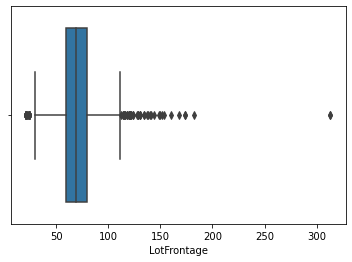

In [2980]:
sns.boxplot(df['LotFrontage'])

In [2981]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

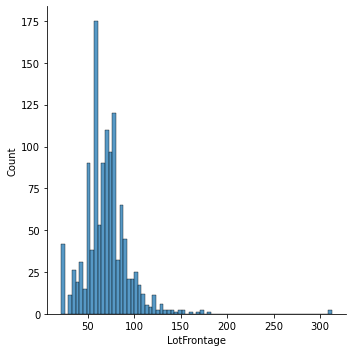

In [2982]:
plt.figure()
sns.displot(df['LotFrontage'])
plt.show()

## Outlier identification

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

## To remove the outliers it is necessary to identify the outliers 

## we filter out the data using Inter Quartile Range to remove the outliers 

For this first let segregate the numerical and categorical data 
Then will remove outliers from numerical data

In [2983]:
num_col= df.select_dtypes(exclude='object').columns

In [2984]:
num_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [2985]:
Q1 = df[num_col].quantile(0.05)
Q3 = df[num_col].quantile(0.95)

In [2986]:
Q1,Q3

(MSSubClass          20.00
 LotFrontage         34.00
 LotArea           3311.70
 OverallQual          4.00
 OverallCond          4.00
 YearBuilt         1916.00
 YearRemodAdd      1950.00
 MasVnrArea           0.00
 BsmtFinSF1           0.00
 BsmtFinSF2           0.00
 BsmtUnfSF            0.00
 TotalBsmtSF        519.30
 1stFlrSF           672.95
 2ndFlrSF             0.00
 LowQualFinSF         0.00
 GrLivArea          848.00
 BsmtFullBath         0.00
 BsmtHalfBath         0.00
 FullBath             1.00
 HalfBath             0.00
 BedroomAbvGr         2.00
 KitchenAbvGr         1.00
 TotRmsAbvGrd         4.00
 Fireplaces           0.00
 GarageYrBlt       1930.00
 GarageCars           0.00
 GarageArea           0.00
 WoodDeckSF           0.00
 OpenPorchSF          0.00
 EnclosedPorch        0.00
 3SsnPorch            0.00
 ScreenPorch          0.00
 PoolArea             0.00
 MiscVal              0.00
 MoSold               2.00
 YrSold            2006.00
 SalePrice        88000.00
 

In [2987]:
# inter quartile range , IQR
IQR = Q3-Q1
IQR

MSSubClass          140.00
LotFrontage          73.00
LotArea           14089.45
OverallQual           4.00
OverallCond           4.00
YearBuilt            91.00
YearRemodAdd         57.00
MasVnrArea          456.00
BsmtFinSF1         1274.00
BsmtFinSF2          396.20
BsmtUnfSF          1468.00
TotalBsmtSF        1233.70
1stFlrSF           1158.30
2ndFlrSF           1141.05
LowQualFinSF          0.00
GrLivArea          1618.10
BsmtFullBath          1.00
BsmtHalfBath          1.00
FullBath              1.00
HalfBath              1.00
BedroomAbvGr          2.00
KitchenAbvGr          0.00
TotRmsAbvGrd          6.00
Fireplaces            2.00
GarageYrBlt          77.00
GarageCars            3.00
GarageArea          850.10
WoodDeckSF          335.00
OpenPorchSF         175.05
EnclosedPorch       180.15
3SsnPorch             0.00
ScreenPorch         160.00
PoolArea              0.00
MiscVal               0.00
MoSold                9.00
YrSold                4.00
SalePrice        238100.00
d

In [2988]:
# to remove all outlier outside the Q1-1.5IQR and Q3+1.5IQR
#df = df[(df[num_col]>=(Q1-1.5*IQR)) &( df[num_col]<=(Q3+1.5*IQR)).any(axis=1)]

In [2989]:
df = df[~((df[num_col] < (Q1 - 1.5 * IQR)) |(df[num_col] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1266.000000,1043.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1259.000000,1266.000000,1266.000000,...,1266.000000,1266.000000,1266.000000,1266.0,1266.000000,1266.0,1266.0,1266.000000,1266.000000,1266.000000
mean,54.522117,69.098754,9640.176935,6.155608,5.567930,1973.480253,1985.822275,104.532168,441.757504,40.281201,...,93.585308,45.843602,21.109795,0.0,14.796998,0.0,0.0,6.293049,2007.804107,181610.662717
std,40.663333,22.010877,4133.746732,1.364816,1.082618,29.436365,20.624538,173.481638,428.430328,137.986440,...,120.249869,60.675897,59.192870,0.0,53.234175,0.0,0.0,2.694788,1.322179,75827.202320
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,2006.000000,35311.000000
25%,20.000000,57.000000,7500.000000,5.000000,5.000000,1955.000000,1968.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,5.000000,2007.000000,131000.000000
50%,50.000000,69.000000,9356.500000,6.000000,5.000000,1976.000000,1995.000000,0.000000,387.500000,0.000000,...,0.000000,27.000000,0.000000,0.0,0.000000,0.0,0.0,6.000000,2008.000000,165000.000000
75%,60.000000,80.000000,11433.250000,7.000000,6.000000,2002.000000,2004.000000,169.000000,719.000000,0.000000,...,168.000000,68.000000,0.000000,0.0,0.000000,0.0,0.0,8.000000,2009.000000,215000.000000
max,190.000000,182.000000,36500.000000,10.000000,9.000000,2010.000000,2010.000000,1129.000000,2188.000000,972.000000,...,736.000000,364.000000,386.000000,0.0,396.000000,0.0,0.0,12.000000,2010.000000,611657.000000


In [2990]:
# to check if outlier treatment is effective
df.describe(percentiles= [0.25,0.50,0.75,0.90,0.95,0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1266.000000,1043.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1259.000000,1266.000000,1266.000000,...,1266.000000,1266.000000,1266.000000,1266.0,1266.000000,1266.0,1266.0,1266.000000,1266.000000,1266.000000
mean,54.522117,69.098754,9640.176935,6.155608,5.567930,1973.480253,1985.822275,104.532168,441.757504,40.281201,...,93.585308,45.843602,21.109795,0.0,14.796998,0.0,0.0,6.293049,2007.804107,181610.662717
std,40.663333,22.010877,4133.746732,1.364816,1.082618,29.436365,20.624538,173.481638,428.430328,137.986440,...,120.249869,60.675897,59.192870,0.0,53.234175,0.0,0.0,2.694788,1.322179,75827.202320
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,2006.000000,35311.000000
25%,20.000000,57.000000,7500.000000,5.000000,5.000000,1955.000000,1968.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,5.000000,2007.000000,131000.000000
50%,50.000000,69.000000,9356.500000,6.000000,5.000000,1976.000000,1995.000000,0.000000,387.500000,0.000000,...,0.000000,27.000000,0.000000,0.0,0.000000,0.0,0.0,6.000000,2008.000000,165000.000000
75%,60.000000,80.000000,11433.250000,7.000000,6.000000,2002.000000,2004.000000,169.000000,719.000000,0.000000,...,168.000000,68.000000,0.000000,0.0,0.000000,0.0,0.0,8.000000,2009.000000,215000.000000
90%,120.000000,95.000000,14003.000000,8.000000,7.000000,2006.000000,2007.000000,329.000000,1056.000000,93.000000,...,253.000000,128.000000,112.000000,0.0,0.000000,0.0,0.0,10.000000,2010.000000,280000.000000
95%,160.000000,106.900000,16186.500000,8.000000,8.000000,2007.000000,2007.750000,451.100000,1255.750000,374.000000,...,321.500000,169.000000,176.000000,0.0,160.000000,0.0,0.0,11.000000,2010.000000,325906.000000
99%,180.000000,132.320000,24297.200000,9.000000,9.000000,2009.000000,2009.000000,769.680000,1549.450000,697.700000,...,479.500000,262.350000,255.750000,0.0,261.050000,0.0,0.0,12.000000,2010.000000,432503.900000


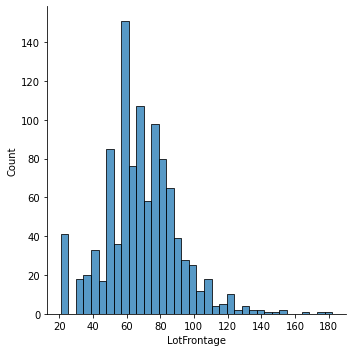

In [2991]:
sns.displot(df['LotFrontage'])

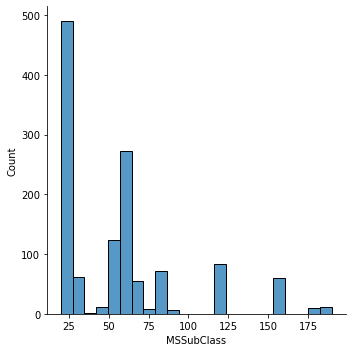

In [2992]:
sns.displot(df['MSSubClass'])

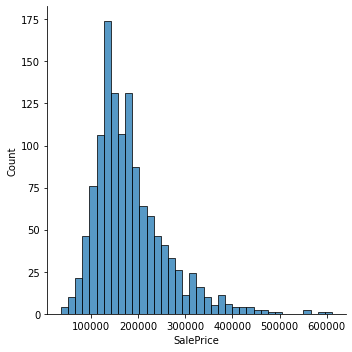

In [2993]:

sns.displot(df['SalePrice'])

In [2994]:
# final shape after outlier treatment
df.shape

(1266, 75)

#### Null values after outlier treatment

In [2995]:
nul_values['percent']= pd.DataFrame((df.isnull().sum()/df.shape[0]*100))
nul_values.sort_values(by='percent',ascending=False).head()

,0,percent
LotFrontage,17.739726,17.614534
GarageType,5.547945,4.344392
GarageYrBlt,5.547945,4.344392
GarageFinish,5.547945,4.344392
GarageQual,5.547945,4.344392


In [2996]:
null_nonzero = nul_values[nul_values['percent']>0]
null_nonzero.sort_values(by='percent',ascending = False)

,0,percent
LotFrontage,17.739726,17.614534
GarageType,5.547945,4.344392
GarageYrBlt,5.547945,4.344392
GarageFinish,5.547945,4.344392
GarageQual,5.547945,4.344392
GarageCond,5.547945,4.344392
BsmtExposure,2.602740,1.500790
BsmtFinType2,2.602740,1.500790
BsmtQual,2.534247,1.421801
BsmtCond,2.534247,1.421801


### First we impute null values of numerical variables

In [2997]:
# the challenge is to find what values need to be substituted in place of null values
# for this each column that requires null value imputation is analysed separately to find the value that can fit the missing portion

In [2998]:
df['LotFrontage'].value_counts()

60.0     111
80.0      61
70.0      60
50.0      52
75.0      46
        ... 
118.0      1
168.0      1
144.0      1
38.0       1
174.0      1
Name: LotFrontage, Length: 104, dtype: int64

In [2999]:
df['LotFrontage'].describe()

count    1043.000000
mean       69.098754
std        22.010877
min        21.000000
25%        57.000000
50%        69.000000
75%        80.000000
max       182.000000
Name: LotFrontage, dtype: float64

<AxesSubplot:xlabel='LotFrontage'>

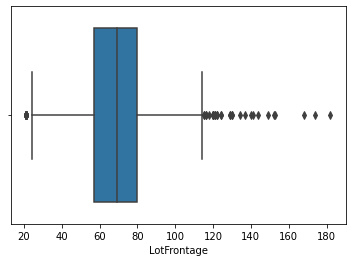

In [3000]:
sns.boxplot(df['LotFrontage'])

In [3001]:
df['LotFrontage'].mean(skipna = True),df['LotFrontage'].median( skipna = True)

(69.0987535953979, 69.0)

In [3002]:
# we accept mean to fill the missing values as mean and median are almost the same
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [3003]:
df['LotFrontage'].isnull().sum()

0

In [3004]:
num_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [3005]:
df['GarageYrBlt'].value_counts()

2005.0    59
2006.0    58
2004.0    52
2007.0    48
2003.0    47
          ..
1927.0     1
1952.0     1
1915.0     1
1910.0     1
1918.0     1
Name: GarageYrBlt, Length: 95, dtype: int64

<AxesSubplot:xlabel='GarageYrBlt'>

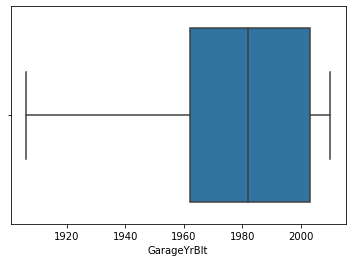

In [3006]:
sns.boxplot(df['GarageYrBlt'])

In [3007]:
df['GarageYrBlt'].median(skipna=True)

1982.0

In [3008]:
# for year built we go with median
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(skipna=True))

In [3009]:
df['GarageYrBlt'].isnull().sum()

0

<AxesSubplot:xlabel='GarageYrBlt'>

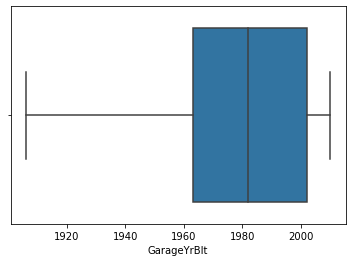

In [3010]:
sns.boxplot(df['GarageYrBlt'])

In [3011]:
df['MasVnrArea'].value_counts()

0.0      727
16.0       7
120.0      7
72.0       7
180.0      7
        ... 
127.0      1
114.0      1
748.0      1
274.0      1
415.0      1
Name: MasVnrArea, Length: 309, dtype: int64

<AxesSubplot:xlabel='MasVnrArea'>

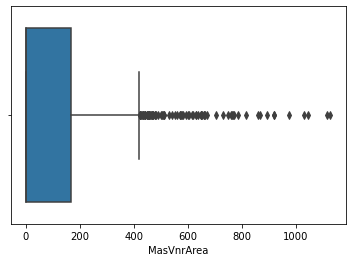

In [3012]:
sns.boxplot(df['MasVnrArea'])

In [3013]:
df['MasVnrArea'].mean(skipna=True)

104.53216838760922

In [3014]:
df['MasVnrArea'].median(skipna=True)

0.0

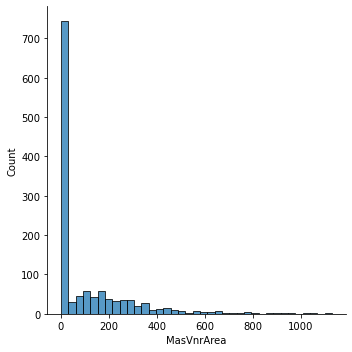

In [3015]:
sns.displot(df['MasVnrArea'])

In [3016]:
# here zero seems to dominate so we fill it with median which is zero
df['MasVnrArea'].isnull().sum()

7

In [3017]:
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].median(skipna=True))

In [3018]:
df['MasVnrArea'].isnull().sum()

0

### Categorical data missing value imputation

In [3019]:
df['GarageType'].mode()

0    Attchd
dtype: object

In [3020]:
df['GarageType'].mode()[0]

'Attchd'

In [3021]:
df['GarageType'].value_counts()

Attchd     784
Detchd     324
BuiltIn     81
Basment     16
CarPort      4
2Types       2
Name: GarageType, dtype: int64

In [3022]:
null_nonzero.sort_values(by='percent',ascending = False)

,0,percent
LotFrontage,17.739726,17.614534
GarageType,5.547945,4.344392
GarageYrBlt,5.547945,4.344392
GarageFinish,5.547945,4.344392
GarageQual,5.547945,4.344392
GarageCond,5.547945,4.344392
BsmtExposure,2.602740,1.500790
BsmtFinType2,2.602740,1.500790
BsmtQual,2.534247,1.421801
BsmtCond,2.534247,1.421801


In [3023]:
print(df['GarageType'].value_counts())
print(df['GarageQual'].value_counts())
print (df['GarageCond'].value_counts())
print(df['BsmtExposure'].value_counts())
print(df['BsmtFinType2'].value_counts())
print(df['BsmtQual'].value_counts())
print(df['BsmtCond'].value_counts())
print(df['BsmtFinType1'].value_counts())
print(df['MasVnrType'].value_counts())
print(df['Electrical'].value_counts())

Attchd     784
Detchd     324
BuiltIn     81
Basment     16
CarPort      4
2Types       2
Name: GarageType, dtype: int64
TA    1162
Fa      37
Gd       9
Po       2
Ex       1
Name: GarageQual, dtype: int64
TA    1170
Fa      28
Gd       7
Po       5
Ex       1
Name: GarageCond, dtype: int64
No    837
Av    201
Gd    108
Mn    101
Name: BsmtExposure, dtype: int64
Unf    1112
Rec      44
LwQ      39
BLQ      27
ALQ      15
GLQ      10
Name: BsmtFinType2, dtype: int64
Gd    563
TA    547
Ex    111
Fa     27
Name: BsmtQual, dtype: int64
TA    1151
Gd      58
Fa      37
Po       2
Name: BsmtCond, dtype: int64
GLQ    378
Unf    378
ALQ    190
BLQ    127
Rec    116
LwQ     59
Name: BsmtFinType1, dtype: int64
None       729
BrkFace    397
Stone      120
BrkCmn      13
Name: MasVnrType, dtype: int64
SBrkr    1166
FuseA      76
FuseF      21
FuseP       1
Mix         1
Name: Electrical, dtype: int64


<AxesSubplot:xlabel='GarageType', ylabel='count'>

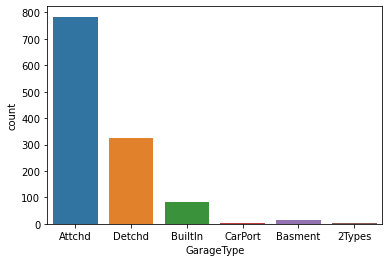

In [3024]:
sns.countplot(x=df['GarageType'])

### on analysis of categorical variable it is found that mode will be suitable to replace the missing values

In [3025]:
cat_nul = ['GarageType','GarageQual','GarageCond','BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond',
          'BsmtFinType1','MasVnrType','Electrical','GarageFinish']

In [3026]:
# fill all categorical values with mode of the categorical values
for item in cat_nul:
    df[item]= df[item].fillna(df[item].mode()[0])

In [3027]:
# check if the all values are imputed
for item in cat_nul:
    print("null values in {} is {}" .format (item, df[item].isnull().sum()))

null values in GarageType is 0
null values in GarageQual is 0
null values in GarageCond is 0
null values in BsmtExposure is 0
null values in BsmtFinType2 is 0
null values in BsmtQual is 0
null values in BsmtCond is 0
null values in BsmtFinType1 is 0
null values in MasVnrType is 0
null values in Electrical is 0
null values in GarageFinish is 0


In [3028]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [3029]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1266 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1266 non-null   int64  
 1   MSZoning       1266 non-null   object 
 2   LotFrontage    1266 non-null   float64
 3   LotArea        1266 non-null   int64  
 4   Street         1266 non-null   object 
 5   LotShape       1266 non-null   object 
 6   LandContour    1266 non-null   object 
 7   Utilities      1266 non-null   object 
 8   LotConfig      1266 non-null   object 
 9   LandSlope      1266 non-null   object 
 10  Neighborhood   1266 non-null   object 
 11  Condition1     1266 non-null   object 
 12  Condition2     1266 non-null   object 
 13  BldgType       1266 non-null   object 
 14  HouseStyle     1266 non-null   object 
 15  OverallQual    1266 non-null   int64  
 16  OverallCond    1266 non-null   int64  
 17  YearBuilt      1266 non-null   int64  
 18  YearRemo

## Correlation Matrix

In [3030]:
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.429898,-0.375677,0.080110,-0.068890,0.115561,0.078595,0.054924,-0.055573,-0.059316,...,0.008671,0.002302,-0.040649,NaN,-0.019973,NaN,NaN,-0.022095,-0.018137,-0.061811
LotFrontage,-0.429898,1.000000,0.525323,0.240440,-0.057392,0.149486,0.088652,0.164639,0.134271,0.036832,...,0.092729,0.139257,-0.003980,NaN,0.058117,NaN,NaN,0.020934,0.005810,0.371184
LotArea,-0.375677,0.525323,1.000000,0.169467,-0.046277,0.057208,0.017120,0.137925,0.191143,0.060267,...,0.169573,0.155584,-0.008469,NaN,0.101074,NaN,NaN,-0.016786,-0.018496,0.367881
OverallQual,0.080110,0.240440,0.169467,1.000000,-0.142784,0.596958,0.552318,0.413516,0.198569,-0.108841,...,0.243185,0.324980,-0.127614,NaN,0.040899,NaN,NaN,0.089042,-0.003246,0.811782
OverallCond,-0.068890,-0.057392,-0.046277,-0.142784,1.000000,-0.415526,0.032281,-0.135918,-0.042274,0.049170,...,-0.033767,-0.070286,0.097083,NaN,0.043865,NaN,NaN,-0.000732,0.053485,-0.130213
YearBuilt,0.115561,0.149486,0.057208,0.596958,-0.415526,1.000000,0.620540,0.306392,0.238870,-0.082920,...,0.233302,0.257701,-0.402838,NaN,-0.047855,NaN,NaN,0.027543,-0.005726,0.566845
YearRemodAdd,0.078595,0.088652,0.017120,0.552318,0.032281,0.620540,1.000000,0.176307,0.103240,-0.114273,...,0.193668,0.266442,-0.209363,NaN,-0.047555,NaN,NaN,0.020865,0.051598,0.526661
MasVnrArea,0.054924,0.164639,0.137925,0.413516,-0.135918,0.306392,0.176307,1.000000,0.221050,-0.068016,...,0.169703,0.133614,-0.105844,NaN,0.059949,NaN,NaN,-0.001331,0.011758,0.479068
BsmtFinSF1,-0.055573,0.134271,0.191143,0.198569,-0.042274,0.238870,0.103240,0.221050,1.000000,-0.058083,...,0.182958,0.103215,-0.124458,NaN,0.071657,NaN,NaN,-0.014545,0.030907,0.382247
BsmtFinSF2,-0.059316,0.036832,0.060267,-0.108841,0.049170,-0.082920,-0.114273,-0.068016,-0.058083,1.000000,...,0.052323,-0.027137,0.063117,NaN,0.051123,NaN,NaN,0.005578,0.050803,-0.071834


In [3031]:
df['PoolArea'].mean(), df['MiscVal'].mean(), df['3SsnPorch'].mean(), df['LowQualFinSF'].mean(), df['KitchenAbvGr'].mean()

(0.0, 0.0, 0.0, 0.0, 1.0)

In [3032]:
df['KitchenAbvGr'].describe()

count    1266.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: KitchenAbvGr, dtype: float64

In [3033]:
df['KitchenAbvGr'].value_counts()

1    1266
Name: KitchenAbvGr, dtype: int64

In [3034]:
df['PoolArea'].value_counts()

0    1266
Name: PoolArea, dtype: int64

In [3035]:
df['MiscVal'].value_counts()

0    1266
Name: MiscVal, dtype: int64

In [3036]:
# will drop month sold, Misc Valuation, 3SsnPorch,KitchenAbvGr,LowQualFinSF as it doesnt hold much value to our model
df = df.drop('MoSold', axis=1)
df = df.drop('3SsnPorch', axis=1)
df = df.drop('MiscVal', axis=1)
df= df.drop('LowQualFinSF', axis=1)
df= df.drop('KitchenAbvGr', axis=1)
df= df.drop('PoolArea', axis=1)

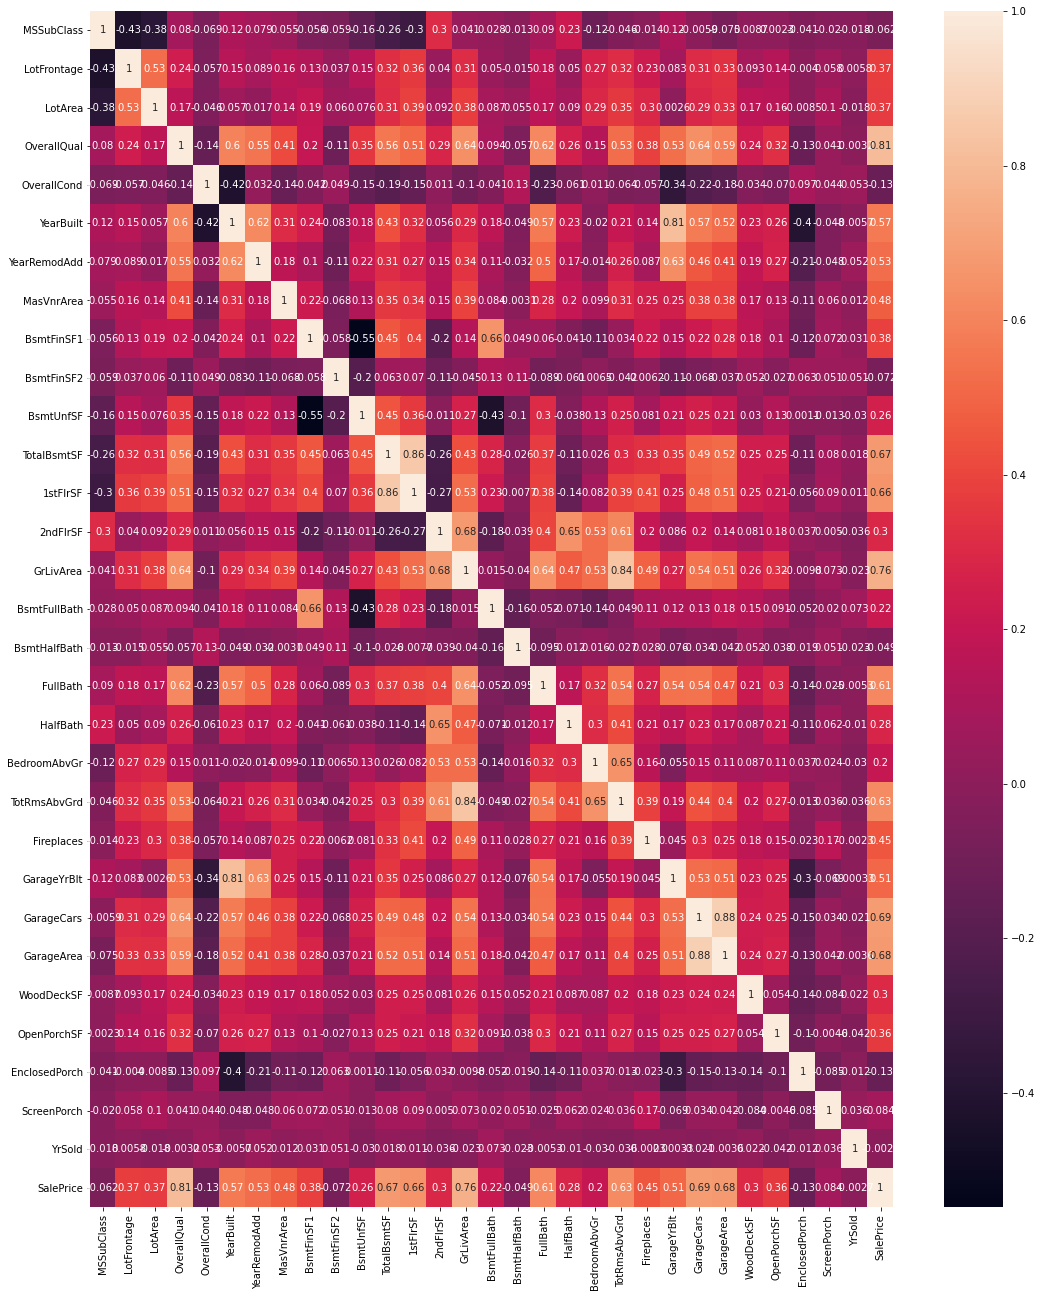

In [3037]:
plt.figure(figsize= (18,22))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Numerical variables

In [3038]:
df.shape

(1266, 69)

In [3039]:
df_num= df.select_dtypes(exclude= 'object')

In [3040]:
df_num.shape

(1266, 31)

In [3041]:
# numerical variables
num_vars= df_num.columns

In [3042]:
num_vars

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'YrSold',
       'SalePrice'],
      dtype='object')

## Creating Dummies for categorical variables

In [3043]:
# categorical variables
df_cat = df.select_dtypes(include ='object')

In [3044]:
df_cat.shape

(1266, 38)

In [3045]:
df_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Abnorml
1454,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal


In [3046]:
cat_vars= df_cat.columns

In [3047]:
cat_vars

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [3048]:
df = pd.get_dummies(df,drop_first= True)

In [3049]:
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,20,90.0,17217,5,5,2006,2006,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
1454,20,62.0,7500,7,5,2004,2005,0.0,410,0,...,0,0,0,0,1,0,0,0,1,0
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,0,1,0,0,0,1,0


In [3050]:
df.info

<bound method DataFrame.info of       MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1453          20         90.0    17217            5            5       2006   
1454          20         62.0     7500            7            5       2004   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd 

In [3051]:
df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=217)

In [3052]:
df['SaleType_WD']

0       1
1       1
2       1
3       1
4       1
       ..
1453    1
1454    1
1455    1
1456    1
1459    1
Name: SaleType_WD, Length: 1266, dtype: uint8

## Derived variables

In [3053]:
df['YearBuilt'],df['YrSold'],df['GarageYrBlt'],df['YrSold']

(0       2003
 1       1976
 2       2001
 3       1915
 4       2000
         ... 
 1453    2006
 1454    2004
 1455    1999
 1456    1978
 1459    1965
 Name: YearBuilt, Length: 1266, dtype: int64,
 0       2008
 1       2007
 2       2008
 3       2006
 4       2008
         ... 
 1453    2006
 1454    2009
 1455    2007
 1456    2010
 1459    2008
 Name: YrSold, Length: 1266, dtype: int64,
 0       2003.0
 1       1976.0
 2       2001.0
 3       1998.0
 4       2000.0
          ...  
 1453    1982.0
 1454    2004.0
 1455    1999.0
 1456    1978.0
 1459    1965.0
 Name: GarageYrBlt, Length: 1266, dtype: float64,
 0       2008
 1       2007
 2       2008
 3       2006
 4       2008
         ... 
 1453    2006
 1454    2009
 1455    2007
 1456    2010
 1459    2008
 Name: YrSold, Length: 1266, dtype: int64)

### Derived variables

In [3054]:
# we add a new variable called age from years so that it will make data more meaningfull
df['YearBuilt']= 2022-df['YearBuilt']
df['YrSold']= 2022-df['YrSold']
df['GarageYrBlt']=2022-df['GarageYrBlt']
df['YrSold']=2022-df['YrSold']

# Splitting to train and test sets

In [3055]:
# target variable
y = df.pop('SalePrice')

In [3056]:
X= df

In [3057]:
from sklearn.model_selection import train_test_split

In [3058]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [3059]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((886, 216), (380, 216), (886,), (380,))

In [3060]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
686,60,84.0,10207,7,6,15,2007,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1
933,20,63.0,8487,7,5,18,2004,210.0,20,0,...,0,0,0,0,1,0,0,0,1,0
1217,20,72.0,8640,8,5,13,2009,72.0,936,0,...,0,0,1,0,0,0,0,0,0,1
485,20,80.0,9600,5,7,72,2007,0.0,607,0,...,0,0,0,0,1,0,0,0,1,0
1303,20,73.0,8688,7,5,17,2005,228.0,0,0,...,0,0,0,0,1,0,0,0,1,0


## Scaling Numerical variables

In [3061]:
num_vars

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'YrSold',
       'SalePrice'],
      dtype='object')

In [3062]:
# we remove the sale price from num_vars
num_vars=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'YrSold']

In [3063]:
X_train[num_vars].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,YrSold
686,60,84.0,10207,7,6,15,2007,0.0,0,0,...,7,0,15.0,2,578,144,105,0,0,2007
933,20,63.0,8487,7,5,18,2004,210.0,20,0,...,6,0,18.0,2,570,192,36,0,0,2009
1217,20,72.0,8640,8,5,13,2009,72.0,936,0,...,6,0,13.0,2,552,135,112,0,0,2009
485,20,80.0,9600,5,7,72,2007,0.0,607,0,...,5,1,72.0,1,264,0,80,120,0,2009
1303,20,73.0,8688,7,5,17,2005,228.0,0,0,...,7,0,17.0,3,834,208,59,0,0,2006


In [3064]:
X_train[num_vars].shape

(886, 30)

In [3065]:
X_test[num_vars].shape

(380, 30)

In [3066]:
# import scaler
from sklearn.preprocessing import MinMaxScaler

In [3067]:
# The data is found to have outliers although we have identified and removed some we would further like to nullify
# the outlier influence so we MinMaxScaler
scaler= MinMaxScaler()

In [3068]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [3069]:
X_train[num_vars].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,YrSold
686,0.235294,0.391304,0.253040,0.666667,0.571429,0.023077,0.950000,0.000000,0.000000,0.0,...,0.5,0.000000,0.031915,0.50,0.426254,0.195652,0.288462,0.000000,0.0,0.25
933,0.000000,0.260870,0.204176,0.666667,0.428571,0.046154,0.900000,0.186005,0.009141,0.0,...,0.4,0.000000,0.063830,0.50,0.420354,0.260870,0.098901,0.000000,0.0,0.75
1217,0.000000,0.316770,0.208523,0.777778,0.428571,0.007692,0.983333,0.063773,0.427788,0.0,...,0.4,0.000000,0.010638,0.50,0.407080,0.183424,0.307692,0.000000,0.0,0.75
485,0.000000,0.366460,0.235795,0.444444,0.714286,0.461538,0.950000,0.000000,0.277422,0.0,...,0.3,0.333333,0.638298,0.25,0.194690,0.000000,0.219780,0.310881,0.0,0.75
1303,0.000000,0.322981,0.209886,0.666667,0.428571,0.038462,0.916667,0.201949,0.000000,0.0,...,0.5,0.000000,0.053191,0.75,0.615044,0.282609,0.162088,0.000000,0.0,0.00


In [3070]:
X_train[num_vars].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,YrSold
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,...,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,0.205086,0.297826,0.237373,0.575245,0.508384,0.278937,0.597968,0.097797,0.203996,0.040692,...,0.440858,0.205418,0.321070,0.446670,0.351044,0.123503,0.123388,0.054664,0.039478,0.459650
std,0.242264,0.128645,0.119473,0.151401,0.152193,0.222710,0.340155,0.161548,0.197313,0.140748,...,0.150633,0.208882,0.251007,0.180372,0.150588,0.162705,0.165532,0.154896,0.139998,0.333607
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.242236,0.170980,0.444444,0.428571,0.061538,0.300000,0.000000,0.000000,0.000000,...,0.300000,0.000000,0.085106,0.250000,0.247788,0.000000,0.000000,0.000000,0.000000,0.250000
50%,0.176471,0.298750,0.227699,0.555556,0.428571,0.261538,0.750000,0.000000,0.182358,0.000000,...,0.400000,0.333333,0.297872,0.500000,0.349926,0.000000,0.074176,0.000000,0.000000,0.500000
75%,0.235294,0.360248,0.290987,0.666667,0.571429,0.415385,0.900000,0.155447,0.334895,0.000000,...,0.500000,0.333333,0.500000,0.500000,0.425516,0.228261,0.178571,0.000000,0.000000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model Building

In [3071]:
from sklearn.linear_model import LinearRegression

In [3072]:
from sklearn.feature_selection import RFE

## Linear Regression Model

In [3073]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)

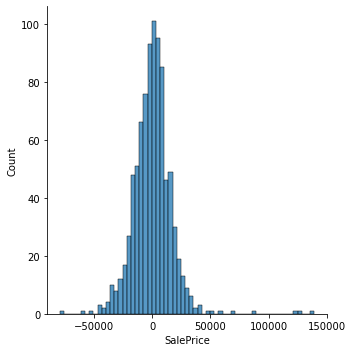

In [3074]:
# residuals
res = y_train-y_train_pred
sns.displot(res)

In [3075]:
# R2 score 
from sklearn.metrics import r2_score,mean_squared_error

In [3076]:
r2_lr_train= r2_score(y_train,y_train_pred)
r2_lr_train

0.9497506523018955

In [3077]:
mse_lr_train=mean_squared_error(y_train,y_train_pred)
mse_lr_train

292913666.03273135

In [3078]:
y_test_pred = lr.predict(X_test)

In [3079]:
mse_lr_test=mean_squared_error(y_test,y_test_pred)
mse_lr_test

1.8681775219174923e+29

In [3080]:
r2_lr_test= r2_score(y_test,y_test_pred)
r2_lr_test

-3.373567319250438e+19

### reg_metrics data frame to store and compare all the regression parameters

In [3081]:
# Dataframe to save the values of all the regression coeficients
reg_metrics =pd.DataFrame(columns=['Metrics','Linear Regression'] )
reg_metrics['Metrics']= ['R2_train','R2_test','MSE_train','MSE_test']
reg_metrics

,Metrics,Linear Regression
0,R2_train,NaN
1,R2_test,NaN
2,MSE_train,NaN
3,MSE_test,NaN


In [3082]:

reg_metrics['Linear Regression']=[r2_lr_train,r2_lr_test,mse_lr_train,mse_lr_test]
reg_metrics

,Metrics,Linear Regression
0,R2_train,9.497507e-01
1,R2_test,-3.373567e+19
2,MSE_train,2.929137e+08
3,MSE_test,1.868178e+29


### the difference in R2 score shows the the case of over fitting

## Now find out the relevant features using RFE

# RFE

In [3083]:
rfe = RFE(lr,30)
rfe = rfe.fit(X_train,y_train)

In [3084]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 36),
 ('LotFrontage', False, 52),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 84),
 ('MasVnrArea', False, 10),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 14),
 ('BsmtUnfSF', False, 11),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 162),
 ('BsmtHalfBath', False, 180),
 ('FullBath', False, 118),
 ('HalfBath', False, 119),
 ('BedroomAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 48),
 ('Fireplaces', False, 124),
 ('GarageYrBlt', False, 83),
 ('GarageCars', False, 85),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 117),
 ('OpenPorchSF', False, 71),
 ('EnclosedPorch', False, 86),
 ('ScreenPorch', False, 49),
 ('YrSold', False, 181),
 ('MSZoning_FV', False, 30),
 ('MSZoning_RH', False, 27),
 ('MSZoning_RL', False, 34),
 ('MSZoning_RM', False, 35),
 ('Street_Pave', False, 39),
 ('LotShape_IR2', False, 116

In [3085]:
sup_col = X_train.columns[rfe.support_]
sup_col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr',
       'GarageArea', 'Neighborhood_StoneBr', 'Condition1_RRAe',
       'Condition2_PosN', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'Exterior1st_Stone', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundation_Slab', 'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_TA', 'SaleType_CWD', 'SaleType_Con'],
      dtype='object')

In [3086]:
X_train_rfe =X_train[sup_col]
X_test_rfe =X_test[sup_col]

In [3087]:
X_train_rfe.shape

(886, 30)

In [3088]:
X_test_rfe.shape

(380, 30)

In [3089]:
lr_rfe = lr.fit(X_train_rfe,y_train)

In [3090]:
y_train_pred1= lr.predict(X_train_rfe)

In [3091]:
lr_rfe.intercept_

16582.66167211876

In [3092]:
lr_rfe.coef_

array([ 56985.21967254,  79551.11319847,  46242.88737648, -45252.32357574,
        30011.41205468,  97406.31423395,  80568.87046342,  53810.21404789,
       102748.01347648, -27765.28740012,  46274.47758625,  30797.69409811,
       -34594.03390866, -40357.30797037,  64005.94016503,  87682.64446393,
        64155.7107701 ,  51171.00014816,  66353.77584043, -47267.42981057,
       -44469.14848352, -46543.34154563, -57999.04806599,  22278.21118616,
       -36947.38797726, -35166.69889123, -32351.13059391, -33336.66328262,
        26051.62059431,  60857.94918267])

In [3093]:
r2_rfe_train =r2_score(y_train,y_train_pred1)

In [3094]:
y_test_pred1 = lr.predict(X_test_rfe)

In [3095]:
r2_rfe_test = r2_score(y_test,y_test_pred1)

In [3096]:
mse_rfe_train= mean_squared_error(y_train,y_train_pred1)
mse_rfe_train

569673256.0274012

In [3097]:
mse_rfe_test= mean_squared_error(y_test,y_test_pred1)
mse_rfe_test

670875815.8997186

In [3098]:
reg_metrics['LR with RFE']=[r2_rfe_train,r2_rfe_test,mse_rfe_train,mse_rfe_test]
reg_metrics

,Metrics,Linear Regression,LR with RFE
0,R2_train,9.497507e-01,9.022725e-01
1,R2_test,-3.373567e+19,8.788528e-01
2,MSE_train,2.929137e+08,5.696733e+08
3,MSE_test,1.868178e+29,6.708758e+08


### With RFE we have improved the model further and we would like to improve it further with regularisation to nullify the posibility of overfitting

# Regularisation Ridge and Lasso Regression

In [3099]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

## Ridge

In [3100]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [3101]:
# The best fit parameters for ridge regression is given by
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 1.0}
-17215.365843609812


In [3102]:
# For the best alpha value we predict the target variable.
alpha = 1
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([ 50778.22667351,  81428.95231374,  42290.26397201, -41665.7049907 ,
        32403.08445797,  85959.96880578,  78784.59741252,  49898.89367084,
        99065.12772746, -17451.2750763 ,  47967.51874453,  29571.36358938,
       -27330.60220677, -17679.69475002,  26974.18107424,  41944.43593835,
        28074.09066349,  10992.07765191,  17666.77262865, -22201.73149335,
       -33302.93725003, -42334.27720614, -55485.66362835,  15184.7767096 ,
       -25038.87608865, -36468.97608481, -33335.88783103, -35437.21221626,
        19786.32043102,  31823.32641792])

In [3103]:
results =pd.DataFrame(ridge_model.cv_results_)
results = results[results['param_alpha']<=1000]
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002527,1.553148e-03,0.001115,0.000230,0.0001,{'alpha': 0.0001},-16757.835184,-18365.555083,-15020.234633,-18784.726461,...,-17394.345554,1366.689152,17,-16591.873836,-16296.357960,-16896.238189,-16263.310962,-16092.592753,-16428.074740,283.919614
1,0.001527,8.471229e-05,0.000861,0.000036,0.001,{'alpha': 0.001},-16757.670022,-18365.396512,-15019.804807,-18784.284881,...,-17393.879787,1366.633853,16,-16591.902449,-16296.256181,-16896.388257,-16263.359524,-16092.865122,-16428.154306,283.911873
2,0.001441,4.233471e-05,0.000827,0.000022,0.01,{'alpha': 0.01},-16756.034450,-18363.837689,-15015.524713,-18779.891458,...,-17389.280422,1366.105972,15,-16592.186059,-16295.225127,-16897.864244,-16263.829938,-16095.530030,-16428.927080,283.845884
3,0.001438,6.942412e-05,0.000804,0.000005,0.05,{'alpha': 0.05},-16749.072907,-18357.406907,-14996.903505,-18761.558984,...,-17370.153180,1364.388861,14,-16593.325255,-16292.285346,-16904.296280,-16266.045631,-16106.392218,-16432.468946,283.608878
4,0.001415,3.114772e-05,0.000806,0.000009,0.1,{'alpha': 0.1},-16740.917521,-18350.189893,-14975.356362,-18739.875220,...,-17348.716608,1362.856864,12,-16594.359459,-16290.712359,-16912.329252,-16269.778029,-16119.324563,-16437.300732,283.189121
5,0.001495,5.130081e-05,0.000851,0.000010,0.2,{'alpha': 0.2},-16725.782434,-18337.285425,-14939.211122,-18698.765224,...,-17312.369004,1360.094683,11,-16595.586792,-16291.070639,-16925.822360,-16280.807014,-16139.436002,-16446.544561,282.091311
6,0.001447,3.139168e-06,0.000835,0.000002,0.3,{'alpha': 0.3},-16747.812075,-18325.384614,-14906.398295,-18660.158697,...,-17289.563376,1355.969728,10,-16595.818890,-16307.303115,-16935.661096,-16291.790723,-16156.008314,-16457.316428,278.813876
7,0.001444,5.282788e-06,0.000834,0.000001,0.4,{'alpha': 0.4},-16779.273394,-18313.930204,-14876.464678,-18626.351945,...,-17273.258768,1352.739842,8,-16597.913252,-16320.654328,-16942.758212,-16302.007004,-16170.937215,-16466.854002,275.600060
8,0.001382,5.148671e-05,0.000807,0.000023,0.5,{'alpha': 0.5},-16804.966744,-18303.016801,-14849.126090,-18602.600204,...,-17259.963871,1352.060115,7,-16599.331006,-16330.669004,-16951.144766,-16312.569944,-16184.233263,-16475.589597,273.470494
9,0.001357,2.382516e-05,0.000790,0.000011,0.6,{'alpha': 0.6},-16823.065053,-18292.535054,-14824.115994,-18579.597319,...,-17246.960722,1351.926770,6,-16600.832953,-16339.212911,-16964.136397,-16321.562577,-16196.040403,-16484.357048,273.660450


In [3104]:
results['param_alpha']

0     0.0001
1      0.001
2       0.01
3       0.05
4        0.1
5        0.2
6        0.3
7        0.4
8        0.5
9        0.6
10       0.7
11       0.8
12       0.9
13       1.0
14       2.0
15       3.0
16       4.0
17       5.0
18       6.0
19       7.0
20       8.0
21       9.0
22      10.0
23        20
24        50
25       100
26       500
27      1000
Name: param_alpha, dtype: object

In [3105]:
y_train_pred=ridge.predict(X_train_rfe)
y_test_pred=ridge.predict(X_test_rfe)

In [3106]:
r2_ridge_train= r2_score(y_train_pred,y_train)
r2_ridge_train

0.8862063958654429

In [3107]:
r2_ridge_test= r2_score(y_test_pred,y_test)
r2_ridge_test

0.8719488030218

In [3108]:
mse_ridge_train= mean_squared_error(y_train_pred,y_train)
mse_ridge_train

581634411.1948502

In [3109]:
mse_ridge_test= mean_squared_error(y_test_pred,y_test)
mse_ridge_test

628016987.4363885

## reg_metrics for Ridge is added for comparision

In [3110]:
reg_metrics['Ridge']=[r2_ridge_train,r2_ridge_train,mse_ridge_train,mse_ridge_test]
reg_metrics

,Metrics,Linear Regression,LR with RFE,Ridge
0,R2_train,9.497507e-01,9.022725e-01,8.862064e-01
1,R2_test,-3.373567e+19,8.788528e-01,8.862064e-01
2,MSE_train,2.929137e+08,5.696733e+08,5.816344e+08
3,MSE_test,1.868178e+29,6.708758e+08,6.280170e+08


#### The R2 values are very close for test and train set we have a more generalised model

## Ridge Model Evaluation

### Evaluation of residuals 

Text(0.5, 0, 'Residuals')

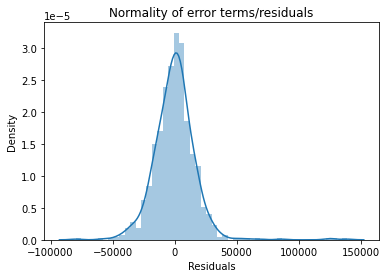

In [3111]:
# plot of residuals for train set
res_ridge= y_train_pred-y_train
sns.distplot(res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
#plt.show()

Text(0.5, 0, 'Residuals')

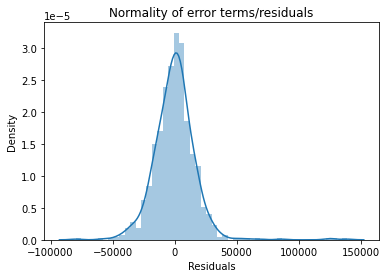

In [3112]:
res_ridge_test= y_test_pred-y_test
sns.distplot(res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
#plt.show()

### Evaluation of test and predicted values

<function matplotlib.pyplot.show(close=None, block=None)>

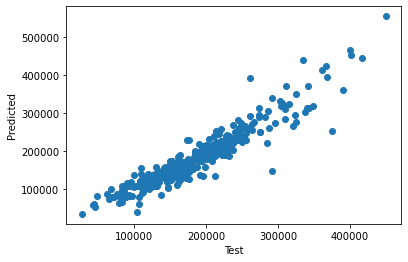

In [3113]:
plt.scatter(y_test_pred,y_test)
plt.xlabel('Test')
plt.ylabel('Predicted')
plt.show

# Lasso Model

In [3114]:
lasso=Lasso()
lasso_model = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [3115]:
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 20}
-17365.670996495384


In [3116]:
alpha=20
lasso= Lasso(alpha=alpha)
lasso.fit(X_train_rfe,y_train)
lasso.coef_

array([ 53042.65117879,  82043.34539541,  44427.30950101, -43355.31412565,
        30529.76129473,  92539.05678129,      0.        ,   6534.02072102,
       189687.96889459, -23137.37137492,  46023.90394176,  29723.37247371,
       -29612.62169872, -20035.82838235,  39392.41492249,  59143.60078745,
        39762.63738294,  20337.64549851,  27245.91742758, -29332.21791479,
       -37545.69634767, -44392.33443091, -56383.90920706,  17963.98595512,
       -28500.88208664, -35501.07429911, -32518.80154847, -34003.96871889,
        19939.09553627,  44007.08717418])

In [3117]:
y_train_pred= lasso.predict(X_train_rfe)
y_test_pred= lasso.predict(X_test_rfe)

In [3118]:
r2_lasso_train= r2_score(y_train_pred,y_train)
r2_lasso_train

0.8895628956741143

In [3119]:
r2_lasso_test= r2_score(y_test_pred,y_test)
r2_lasso_test

0.8717670329745735

In [3120]:
mse_lasso_train= mean_squared_error(y_train_pred,y_train)
mse_lasso_train

574740142.4955035

In [3121]:
mse_lasso_test= mean_squared_error(y_test_pred,y_test)
mse_lasso_test

640956958.4503033

In [3122]:
y_train_pred= lasso.predict(X_train_rfe)
y_test_pred= lasso.predict(X_test_rfe)
r2_lasso_train= r2_score(y_train_pred,y_train)
r2_lasso_train

0.8895628956741143

In [3123]:
mse_lasso_train= mean_squared_error(y_train_pred,y_train)
mse_lasso_train
mse_lasso_test= mean_squared_error(y_test_pred,y_test)
mse_lasso_test

640956958.4503033

In [3124]:
reg_metrics['Lasso']=[r2_lasso_train, r2_lasso_test, mse_lasso_train, mse_lasso_test]
reg_metrics

,Metrics,Linear Regression,LR with RFE,Ridge,Lasso
0,R2_train,9.497507e-01,9.022725e-01,8.862064e-01,8.895629e-01
1,R2_test,-3.373567e+19,8.788528e-01,8.862064e-01,8.717670e-01
2,MSE_train,2.929137e+08,5.696733e+08,5.816344e+08,5.747401e+08
3,MSE_test,1.868178e+29,6.708758e+08,6.280170e+08,6.409570e+08


## Lasso model Evaluation

### Residuals

Text(0.5, 0, 'Residuals')

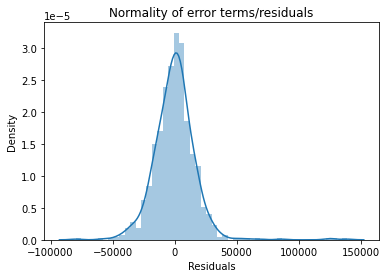

In [3125]:
# plot of residuals for train set
res_ridge= y_train_pred-y_train
sns.distplot(res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
#plt.show()

Text(0.5, 0, 'Residuals')

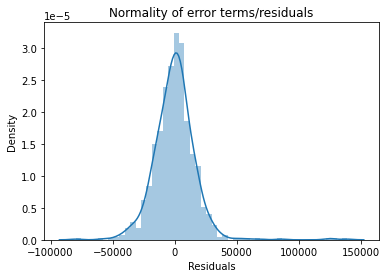

In [3126]:
#test residuals
res_ridge_test= y_test_pred-y_test
sns.distplot(res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
#plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

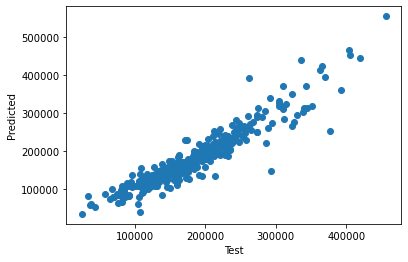

In [3127]:
plt.scatter(y_test_pred,y_test)
plt.xlabel('Test')
plt.ylabel('Predicted')
plt.show

## Ridge and Lasso regression coefficients

In [3128]:
coef = pd.DataFrame(columns=['Beta','Ridge','Lasso'])

In [3129]:
coef['Beta'] = X_train_rfe.columns
coef['Beta']

0                  LotArea
1              OverallQual
2              OverallCond
3                YearBuilt
4               BsmtFinSF1
5              TotalBsmtSF
6                 1stFlrSF
7                 2ndFlrSF
8                GrLivArea
9             BedroomAbvGr
10              GarageArea
11    Neighborhood_StoneBr
12         Condition1_RRAe
13         Condition2_PosN
14         RoofStyle_Gable
15       RoofStyle_Gambrel
16           RoofStyle_Hip
17       RoofStyle_Mansard
18          RoofStyle_Shed
19       Exterior1st_Stone
20            ExterQual_Fa
21            ExterQual_Gd
22            ExterQual_TA
23         Foundation_Slab
24         Foundation_Wood
25             BsmtQual_Fa
26             BsmtQual_Gd
27             BsmtQual_TA
28            SaleType_CWD
29            SaleType_Con
Name: Beta, dtype: object

In [3130]:
coef['Ridge']=ridge.coef_

In [3131]:
coef['Lasso']=lasso.coef_

### comparison of Ridge and Lasso coeficients

In [3132]:
coef

,Beta,Ridge,Lasso
0,LotArea,50778.226674,53042.651179
1,OverallQual,81428.952314,82043.345395
2,OverallCond,42290.263972,44427.309501
3,YearBuilt,-41665.704991,-43355.314126
4,BsmtFinSF1,32403.084458,30529.761295
5,TotalBsmtSF,85959.968806,92539.056781
6,1stFlrSF,78784.597413,0.000000
7,2ndFlrSF,49898.893671,6534.020721
8,GrLivArea,99065.127727,189687.968895
9,BedroomAbvGr,-17451.275076,-23137.371375


## We go for sorted absolute values to find which values have a greater influence 

In [3133]:
coef_sorted_absolute = coef.sort_values(by=['Lasso'],ascending=False,key=pd.Series.abs)
coef_sorted_absolute

,Beta,Ridge,Lasso
8,GrLivArea,99065.127727,189687.968895
5,TotalBsmtSF,85959.968806,92539.056781
1,OverallQual,81428.952314,82043.345395
15,RoofStyle_Gambrel,41944.435938,59143.600787
22,ExterQual_TA,-55485.663628,-56383.909207
0,LotArea,50778.226674,53042.651179
10,GarageArea,47967.518745,46023.903942
2,OverallCond,42290.263972,44427.309501
21,ExterQual_Gd,-42334.277206,-44392.334431
29,SaleType_Con,31823.326418,44007.087174


## Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [3134]:
# We have shortlisted 30 varibales using ridge regression out of which,
# The 10 significant coeficients helpful in predicting the market price dynamics are 
coef['Beta'][:10]

0         LotArea
1     OverallQual
2     OverallCond
3       YearBuilt
4      BsmtFinSF1
5     TotalBsmtSF
6        1stFlrSF
7        2ndFlrSF
8       GrLivArea
9    BedroomAbvGr
Name: Beta, dtype: object

Although both Ridge and Lasso regression performs eqaully well.
In lasso we are able to eliminate one more variable and still get a better R2_score of 0.87 on test which is 
almost equal to 0.88 on train.

# Assignment part II

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

## Ridge

In [3135]:
# for ridge if we double alpha values
# the optimal alpha is from earlier model is alpha=1;
# we set alpha to be 2 for new model
alpha=2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([ 47866.51631933,  80748.07743484,  39131.14812443, -39896.90369921,
        33774.2540179 ,  79497.79621754,  76868.75355525,  47646.64608435,
        96118.50935779, -11107.58077675,  49048.61433041,  28434.90580474,
       -22690.61892968, -10480.14312466,  16605.2241967 ,  29009.83444035,
        18660.69160907,   3082.13841636,   9479.01164216, -14034.0993655 ,
       -27106.88531034, -39419.37780825, -53943.98802478,  10912.52676871,
       -18768.44620425, -36183.866696  , -33684.30978896, -36338.62631695,
        16181.35114698,  21879.44517913])

In [3136]:
y_train_pred = ridge.predict(X_train_rfe)
y_test_pred= ridge.predict(X_test_rfe)

In [3137]:
r2_scoretr = r2_score(y_train_pred, y_train )
r2_scoretr

0.8811262890093955

In [3138]:
r2_scorets = r2_score(y_test_pred, y_test )
r2_scorets

0.8697968884641298

In [3139]:
new_dfr = pd.DataFrame(columns=['Beta','New_ridge'])
new_dfr['Beta']=X_train_rfe.columns

In [3140]:
new_dfr['New_ridge']= ridge.coef_

In [3141]:
sorted_df = new_dfr.sort_values(by=['New_ridge'],ascending=True)

In [3142]:
sorted_df

,Beta,New_ridge
22,ExterQual_TA,-53943.988025
3,YearBuilt,-39896.903699
21,ExterQual_Gd,-39419.377808
27,BsmtQual_TA,-36338.626317
25,BsmtQual_Fa,-36183.866696
26,BsmtQual_Gd,-33684.309789
20,ExterQual_Fa,-27106.885310
12,Condition1_RRAe,-22690.618930
24,Foundation_Wood,-18768.446204
19,Exterior1st_Stone,-14034.099365


In [3143]:
# sort by absolute values
sorted_df = new_df.sort_values(by=['New_ridge'],ascending=False,key=pd.Series.abs)
sorted_df

,Betas,New_ridge
8,GrLivArea,96118.509358
1,OverallQual,80748.077435
5,TotalBsmtSF,79497.796218
6,1stFlrSF,76868.753555
22,ExterQual_TA,-53943.988025
10,GarageArea,49048.614330
0,LotArea,47866.516319
7,2ndFlrSF,47646.646084
3,YearBuilt,-39896.903699
21,ExterQual_Gd,-39419.377808


In [3144]:
# The most important 10 predictor variables are 
sorted_df[:10]

,Betas,New_ridge
8,GrLivArea,96118.509358
1,OverallQual,80748.077435
5,TotalBsmtSF,79497.796218
6,1stFlrSF,76868.753555
22,ExterQual_TA,-53943.988025
10,GarageArea,49048.614330
0,LotArea,47866.516319
7,2ndFlrSF,47646.646084
3,YearBuilt,-39896.903699
21,ExterQual_Gd,-39419.377808


In [3145]:
y_train_pred=ridge.predict(X_train_rfe)
y_test_pred=ridge.predict(X_test_rfe)
r2_ridge_train= r2_score(y_train_pred,y_train)
print(r2_ridge_train)
r2_ridge_test= r2_score(y_test_pred,y_test)
print(r2_ridge_test)
mse_ridge_train= mean_squared_error(y_train_pred,y_train)
print(mse_ridge_train)
mse_ridge_test= mean_squared_error(y_test_pred,y_test)
print(mse_ridge_test)
reg_metrics['Ridge_new']=[r2_ridge_train,r2_ridge_train,mse_ridge_train,mse_ridge_test]
reg_metrics

0.8811262890093955
0.8697968884641298
594034684.0042703
622557733.9967825


,Metrics,Linear Regression,LR with RFE,Ridge,Lasso,Ridge_new
0,R2_train,9.497507e-01,9.022725e-01,8.862064e-01,8.895629e-01,8.811263e-01
1,R2_test,-3.373567e+19,8.788528e-01,8.862064e-01,8.717670e-01,8.811263e-01
2,MSE_train,2.929137e+08,5.696733e+08,5.816344e+08,5.747401e+08,5.940347e+08
3,MSE_test,1.868178e+29,6.708758e+08,6.280170e+08,6.409570e+08,6.225577e+08


### Lasso

In [3146]:
# for lasso if we double alpha values
# the optimal alpha is from earlier model is alpha=20;
# we set alpha to be 40 for new model
alpha=40
lasso= Lasso(alpha=alpha)
lasso.fit(X_train_rfe,y_train)
lasso.coef_

array([ 49531.30745844,  84392.85131819,  42626.96412651, -41905.29526296,
        30983.98894885,  88211.6894558 ,      0.        ,   4249.6323959 ,
       189796.70655416, -18672.69735355,  45560.16068146,  28691.15201804,
       -24704.75041987,     -0.        ,  20215.93751958,  36071.71793855,
        20781.31568969,      0.        ,      0.        , -11259.75561877,
       -30575.70709949, -42268.76486487, -54701.15297569,  13847.88991155,
       -19971.8582724 , -35627.61717265, -32680.80876351, -34536.18553502,
        13848.69990098,  27136.31161766])

In [3147]:
new_dfl = pd.DataFrame(columns=['Beta','New_lasso'])
new_dfl['Beta']=X_train_rfe.columns
new_dfl['New_lasso']= lasso.coef_
# sort by absolute values
sorted_df_lasso= new_dfl.sort_values(by=['New_lasso'],ascending=False,key=pd.Series.abs)
sorted_df_lasso

,Beta,New_lasso
8,GrLivArea,189796.706554
5,TotalBsmtSF,88211.689456
1,OverallQual,84392.851318
22,ExterQual_TA,-54701.152976
0,LotArea,49531.307458
10,GarageArea,45560.160681
2,OverallCond,42626.964127
21,ExterQual_Gd,-42268.764865
3,YearBuilt,-41905.295263
15,RoofStyle_Gambrel,36071.717939


In [3148]:
# The most important 10 predictor variables are 
sorted_df_lasso[:10]['Beta']

8             GrLivArea
5           TotalBsmtSF
1           OverallQual
22         ExterQual_TA
0               LotArea
10           GarageArea
2           OverallCond
21         ExterQual_Gd
3             YearBuilt
15    RoofStyle_Gambrel
Name: Beta, dtype: object

In [3149]:
y_train_pred= lasso.predict(X_train_rfe)
y_test_pred= lasso.predict(X_test_rfe)
r2_lasso_train= r2_score(y_train_pred,y_train)
print(r2_lasso_train)
r2_lasso_test= r2_score(y_test_pred,y_test)
print(r2_lasso_test)
mse_lasso_train= mean_squared_error(y_train_pred,y_train)
print(mse_lasso_train)
mse_lasso_test= mean_squared_error(y_test_pred,y_test)
print(mse_lasso_test)
reg_metrics['Lasso_new']=[r2_lasso_train, r2_lasso_test, mse_lasso_train, mse_lasso_test]
reg_metrics

0.8862090867526939
0.8733231332464292
587021043.267557
623061948.718489


,Metrics,Linear Regression,LR with RFE,Ridge,Lasso,Ridge_new,Lasso_new
0,R2_train,9.497507e-01,9.022725e-01,8.862064e-01,8.895629e-01,8.811263e-01,8.862091e-01
1,R2_test,-3.373567e+19,8.788528e-01,8.862064e-01,8.717670e-01,8.811263e-01,8.733231e-01
2,MSE_train,2.929137e+08,5.696733e+08,5.816344e+08,5.747401e+08,5.940347e+08,5.870210e+08
3,MSE_test,1.868178e+29,6.708758e+08,6.280170e+08,6.409570e+08,6.225577e+08,6.230619e+08


In [3150]:
# model with doubled alpha
coef['new_ridge']=new_dfr['New_ridge']
coef['new_lasso']=new_dfl['New_lasso']
coef

,Beta,Ridge,Lasso,new_ridge,new_lasso
0,LotArea,50778.226674,53042.651179,47866.516319,49531.307458
1,OverallQual,81428.952314,82043.345395,80748.077435,84392.851318
2,OverallCond,42290.263972,44427.309501,39131.148124,42626.964127
3,YearBuilt,-41665.704991,-43355.314126,-39896.903699,-41905.295263
4,BsmtFinSF1,32403.084458,30529.761295,33774.254018,30983.988949
5,TotalBsmtSF,85959.968806,92539.056781,79497.796218,88211.689456
6,1stFlrSF,78784.597413,0.000000,76868.753555,0.000000
7,2ndFlrSF,49898.893671,6534.020721,47646.646084,4249.632396
8,GrLivArea,99065.127727,189687.968895,96118.509358,189796.706554
9,BedroomAbvGr,-17451.275076,-23137.371375,-11107.580777,-18672.697354


Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now

In [3151]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,19,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,46,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,21,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,107,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,22,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [3152]:
# the most importand predicter parameters with respect to absolute values are
coef_sorted_absolute[:5]

,Beta,Ridge,Lasso
8,GrLivArea,99065.127727,189687.968895
5,TotalBsmtSF,85959.968806,92539.056781
1,OverallQual,81428.952314,82043.345395
15,RoofStyle_Gambrel,41944.435938,59143.600787
22,ExterQual_TA,-55485.663628,-56383.909207


In [3153]:
# we drop this from df and make a new data frame
#df_nw= df.drop(columns=['GrLivArea','TotalBsmtSF','OverallQual','RoofStyle_Gambrel','ExterQual_TA'],axis=1)
X_train_rfe_n =X_train_rfe.drop(columns=['GrLivArea','TotalBsmtSF','OverallQual','RoofStyle_Gambrel','ExterQual_TA'],axis=1)
X_test_rfe_n=X_test_rfe.drop(columns=['GrLivArea','TotalBsmtSF','OverallQual','RoofStyle_Gambrel','ExterQual_TA'],axis=1)

In [3154]:
X_train_rfe_n.columns

Index(['LotArea', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', '1stFlrSF',
       '2ndFlrSF', 'BedroomAbvGr', 'GarageArea', 'Neighborhood_StoneBr',
       'Condition1_RRAe', 'Condition2_PosN', 'RoofStyle_Gable',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'Exterior1st_Stone', 'ExterQual_Fa', 'ExterQual_Gd', 'Foundation_Slab',
       'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA',
       'SaleType_CWD', 'SaleType_Con'],
      dtype='object')

In [3155]:
alpha=20
lasso_nw= Lasso(alpha=alpha)
lasso_nw.fit(X_train_rfe_n,y_train)
lasso_nw.coef_

array([ 42973.70328309,  54637.89959676, -66177.39621217,  28896.81577345,
       293399.24820808, 122727.72873361, -35558.64410582,  61947.35115722,
        36462.976235  , -34104.42039522,      0.        ,  17958.69961883,
        22292.57508356,  -1012.27769346,  11885.06685705, -71220.3672006 ,
         2970.37013889,   9698.37365647, -14563.79714585, -31771.38176943,
       -64345.28034001, -57214.01334729, -61972.01412343,  22432.14332505,
        55882.52048063])

In [3156]:
new_dfl_n = pd.DataFrame(columns=['Beta','New_lasso'])
new_dfl_n['Beta']=X_train_rfe_n.columns
new_dfl_n['New_lasso']= lasso_nw.coef_
# sort by absolute values
sorted_df_lasso_n= new_dfl_n.sort_values(by=['New_lasso'],ascending=False,key=pd.Series.abs)
sorted_df_lasso_n

,Beta,New_lasso
4,1stFlrSF,293399.248208
5,2ndFlrSF,122727.728734
15,Exterior1st_Stone,-71220.367201
2,YearBuilt,-66177.396212
20,BsmtQual_Fa,-64345.280340
22,BsmtQual_TA,-61972.014123
7,GarageArea,61947.351157
21,BsmtQual_Gd,-57214.013347
24,SaleType_Con,55882.520481
1,OverallCond,54637.899597


In [3157]:
# The most important 10 predictor variables now are
sorted_df_lasso_n[:10]['Beta']

4              1stFlrSF
5              2ndFlrSF
15    Exterior1st_Stone
2             YearBuilt
20          BsmtQual_Fa
22          BsmtQual_TA
7            GarageArea
21          BsmtQual_Gd
24         SaleType_Con
1           OverallCond
Name: Beta, dtype: object